# Aula 12 - Aula para Físicos, Engenharia e Matemática


In [45]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
smp.init_printing()

## VETORES

### Adicionando Vetores 2D e Visualizando

In [46]:
v1 = np.array([2,3])
v2 = np.array([1,5])
r = v1 + v2
r

array([3, 8])

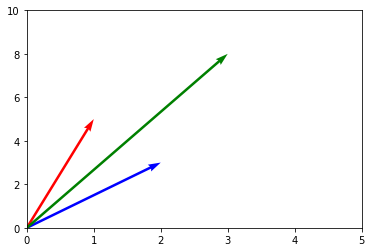

In [47]:
origin = [0,0]
fix, ax = plt.subplots()

ax.set_xlim(0,5)
ax.set_ylim(0,10)

ax.quiver(origin[0],origin[1],v1[0],v1[1], angles ='xy',scale_units = 'xy',scale = 1, color = 'blue')
ax.quiver(origin[0],origin[1],v2[0],v2[1], angles ='xy',scale_units = 'xy',scale = 1, color = 'Red')

ax.quiver(origin[0],origin[1],r[0],r[1]  , angles ='xy',scale_units = 'xy',scale = 1, color = 'green')

plt.show()

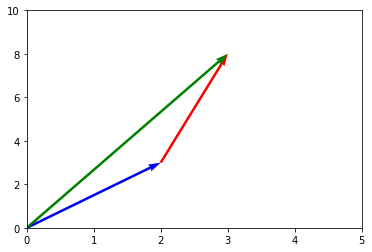

In [48]:
fix, ax = plt.subplots()

ax.set_xlim(0,5)
ax.set_ylim(0,10)

ax.quiver(origin[0],origin[1],v1[0],v1[1], angles ='xy',scale_units = 'xy',scale = 1, color = 'blue')
ax.quiver(    v1[0],    v1[1],v2[0],v2[1], angles ='xy',scale_units = 'xy',scale = 1, color = 'Red')

ax.quiver(origin[0],origin[1], r[0], r[1], angles ='xy',scale_units = 'xy',scale = 1, color = 'green')

plt.show()

###  Plotando vetores 3D em Python

In [49]:
u = np.array([1,3,4])
v = np.array([8,1,1])
q = u + v
q

array([9, 4, 5])

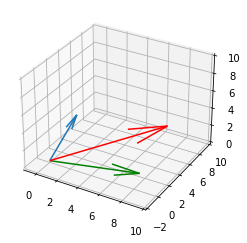

In [50]:
fig = plt.figure()
ax = plt.axes(projection = "3d")
ax.set_xlim([-1,10])
ax.set_ylim([-2,10])
ax.set_zlim([0,10])

start = [0,0,0]
ax.quiver(start[0],start[1],start[2],u[0],u[1],u[2])
ax.quiver(start[0],start[1],start[2],v[0],v[1],v[2], color = 'g')
ax.quiver(start[0],start[1],start[2],q[0],q[1],q[2], color = 'r')
ax.view_init(30,300) # Angulo de Visão

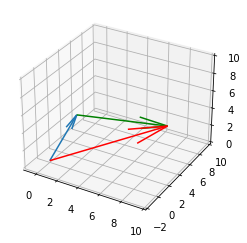

In [51]:
fig = plt.figure()
ax = plt.axes(projection = "3d")
ax.set_xlim([-1,10])
ax.set_ylim([-2,10])
ax.set_zlim([0,10])

start = [0,0,0]
ax.quiver(start[0],start[1],start[2],u[0],u[1],u[2])
ax.quiver(    u[0],    u[1],    u[2],v[0],v[1],v[2], color = 'g')
ax.quiver(start[0],start[1],start[2],q[0],q[1],q[2], color = 'r')
ax.view_init(30,300)

## Na aula 09 a 11 vimos algumas funções utilizando as respectivas bibliotecas, vamos complementar com mais conteudo. 

In [52]:
import numpy as np
import sympy as smp
from sympy.vector import *
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import quad_vec

Vamos referenciar os elementos dos vetores como simbolos para utilizar o Scypy, junto com o Numpy

In [53]:
x, y, z, u1, u2, u3, v1, v2, v3, t = smp.symbols('x y z u_1 u_2 u_3 v_1 v_2 v_3 t')

## Vectores e Geometria

Elementos e Matrizes:

In [54]:
a = np.array([1,2,3])
b = np.array([7,8,9])
u = smp.Matrix([u1,u2,u3])
v = smp.Matrix([v1,v2,v3])

### Adição e multiplicação

In [55]:
2*a+b

array([ 9, 12, 15])

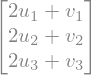

In [56]:
2*u+v

## Produtos Escalar

In [57]:
np.dot(a, b)

50

In [58]:
u.dot(v)

## Produto Vetorial

In [59]:
np.cross(a,b)

array([-6, 12, -6])

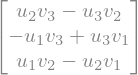

In [60]:
u.cross(v)

## Comprimento do Vetor

In [61]:
np.linalg.norm(a)

* Modulo do vetor:

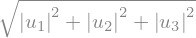

In [62]:
u.norm()

## Projeção Vetorial

$\text{proj}_v(u) = \frac{u \cdot v}{|v|^2} v$

In [63]:
proj_b_a = np.dot(a,b)/np.linalg.norm(b)**2 * b
proj_b_a

array([1.80412371, 2.06185567, 2.31958763])

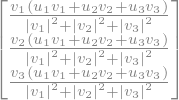

In [64]:
proj_v_u = u.dot(v)/v.norm()**2 * v
proj_v_u

## Linhas/Planos no Espaço:

Linha: $\vec{r}(t) = \vec{r}_0 + t\vec{v}$

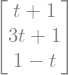

In [65]:
r0 = smp.Matrix([1,1,1])
v = smp.Matrix([1,3,-1])
r = r0 + t*v
r

Plano: $\vec{n} \cdot (P_0-\left<x,y,z\right>) = 0$

In [66]:
P0 = smp.Matrix([4,4,8])
r = smp.Matrix([x,y,z])
n = smp.Matrix([1,1,1])
n.dot(P0-r)

**Exemplo** Encontrar vector paralelo à linha de intersecção dos dois planos $3x-6y-2z = 15$ e $2x+y-2z=5$. (Vai ser perpendicular aos dois vectores normais)

In [67]:
n1 = np.array([-3,6,2])
n2 = np.array([-2,-1,2])
ans = np.cross(n1,n2)
ans

array([14,  2, 15])

## Calculo com vetor

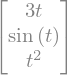

In [68]:
r = smp.Matrix([3*t, smp.sin(t), t**2])
r

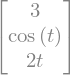

In [69]:
smp.diff(r,t)

Exemplo: Encontrar o ângulo entre a velocidade e a aceleração em função do tempo $\theta(t)$

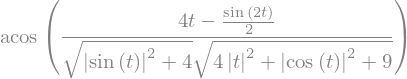

In [70]:
v = smp.diff(r,t)
a = smp.diff(v,t)
theta = smp.acos(v.dot(a)/(v.norm()*a.norm())).simplify()
theta

Substituindo, quando $t = 6$:

In [71]:
theta.subs(t,6).evalf()

Grafico:

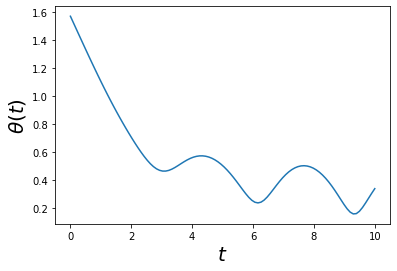

In [72]:
tt = np.linspace(0, 10, 100)
aa = smp.lambdify([t], theta)(tt)
plt.plot(tt,aa)
plt.xlabel('$t$', fontsize=20)
plt.ylabel(r'$\theta(t)$', fontsize=20)
plt.show()

## Integrais com Vetores

__Nota__: Não é considerado o +C

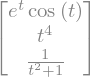

In [73]:
r = smp.Matrix([smp.exp(t)*smp.cos(t), t**4, 1/(1+t**2)])
r

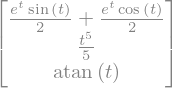

In [74]:
smp.Integral(r).doit()

Em alguns casos, o integral não pode ser avaliado simbolicamente: deve resolver integrais definidos numericamente:

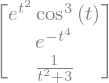

In [75]:
r = smp.Matrix([smp.exp(t**2)*smp.cos(t)**3, smp.exp(-t**4), 1/(3+t**2)])
r

Integrar de $t=0$ a $t=4$

In [76]:
r_num = smp.lambdify([t], r)
quad_vec(r_num, 0, 4)[0]

array([[-4.83559254e+05],
       [ 9.06402477e-01],
       [ 6.70972506e-01]])

## Comprimento do Arco:

$$L = \int_a^b \sqrt{dx^2 + dy^2 + dz^2} = \int_a^b \sqrt{(dx/dt)^2 + (dy/dt)^2 + (dz/dt)^2 } dt $$

Os casos raros podem ser feitos de forma simbólica. Encontrar arclength de $\left< 0, t, t^2 \right>$ de $t=0$ para $t=1$

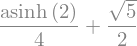

In [77]:
r = smp.Matrix([0, t, t**2])
smp.integrate(smp.diff(r,t).norm(), (t,0,1))

Na maioria dos casos, tem de ser feito de forma numérica. Encontrar o comprimento do arco de $\left< e^t, \sin(t), t^4 \right>$ de $t=0$ para $t=1$

In [78]:
r = smp.Matrix([smp.exp(t), smp.sin(t), t**4])
r_num = smp.lambdify([t], smp.diff(r,t).norm())
quad(r_num, 0, 1)[0]

## Derivadas Parciais/Direcionadas

In [79]:
x, y, z = smp.symbols('x y z')

Basico: 

Derivados Parciais $\partial f / \partial x$ e $\partial f / \partial y$ de $f(x,y)=y^2\sin(x+y)$


In [80]:
f = y**2 * smp.sin(x+y)
f

In [81]:
smp.diff(f,x)

In [82]:
smp.diff(f,y)

Ou coisas mais complicadas como $\frac{\partial^3 f}{\partial xy^2}$

In [83]:
smp.diff(f,y,y,x)

## Gradientes:

Gradiados: $\nabla f$. Agora estamos a lidar com sistemas de coordenadas particulares, por isso temos de ter cuidado:

In [84]:
C = CoordSys3D('')


In [85]:
f = C.x*smp.sin(C.y)
gradient(f)

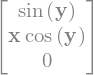

In [86]:
gradient(f).to_matrix(C)

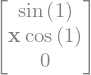

In [87]:
gradient(f).to_matrix(C).subs([(C.y, 1)])


### Sistemas Lineares:

In [95]:
from sympy import *
import  numpy as np

x = symbols('x') 
y = symbols('y') 


In [97]:
eq1 = Eq(5*x +7*y -8,0) 
eq1

In [98]:
eq2 = Eq(6*x +10*y -2,0)
eq2

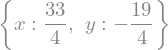

In [99]:
sol = solve((eq1,eq2),(x,y))
sol